Maestría en Análisis de Datos y Sistemas Inteligentes

Sección 4: Algoritmos Evolutivos

Tutor: Dr. Ing. Cesar Hernando Valencia Niño


Algoritmos Genéticos

En esta sección se presentan tres implementaciones progresivas de algoritmos genéticos (GA), con diferentes niveles de complejidad y tipos de problemas, con el objetivo de comprender su estructura básica y su adaptación a distintos dominios de optimización.

Ejemplo 1 – GA Binario (Básico)

Este primer ejemplo implementa un algoritmo genético clásico con codificación binaria, cuyo objetivo es maximizar una función matemática simple:

f(x)=xsin(10πx)+1

El código muestra los componentes esenciales del GA: generación de población inicial, selección por ruleta, cruce de un punto, mutación bit a bit y elitismo.
Sirve para entender el flujo básico del algoritmo y cómo las operaciones genéticas afectan la búsqueda de la solución óptima.

-----------------
Ejemplo 2 – GA por Permutaciones (Intermedio, TSP)

En este segundo ejemplo se aplica un GA a un problema de optimización combinatoria, el Problema del Viajero (TSP), donde se busca encontrar el recorrido más corto que pasa por todas las ciudades.
Aquí se utilizan permutaciones como cromosomas, un cruce ordenado (OX) y mutación por intercambio (swap), además de selección por torneo y elitismo.
Este caso permite comprender cómo adaptar el algoritmo genético a problemas de rutas, asignaciones o secuencias donde el orden importa.

-----------------
Ejemplo 3 – NSGA-II Multiobjetivo (Avanzado)

El tercer ejemplo implementa un algoritmo genético multiobjetivo NSGA-II, capaz de minimizar dos funciones simultáneamente (problema de referencia ZDT1).
Se utilizan variables reales, cruce SBX (Simulated Binary Crossover), mutación polinómica, ordenamiento no dominado, cálculo de distancia de hacinamiento (crowding distance) y selección elitista multiobjetivo.
El resultado es un conjunto de soluciones óptimas (frente de Pareto) que ilustra cómo los GA pueden resolver problemas de optimización complejos y con objetivos en conflicto.

Mejor x ≈ 0.851194, f(x) = 1.850595

Evolución del mejor fitness y cromosoma por generación:
Generación 1: Fitness = 1.809998, Cromosoma = [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
Generación 2: Fitness = 1.809998, Cromosoma = [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
Generación 3: Fitness = 1.809998, Cromosoma = [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
Generación 4: Fitness = 1.838480, Cromosoma = [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Generación 5: Fitness = 1.838754, Cromosoma = [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]
Generación 6: Fitness = 1.850511, Cromosoma = [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
Generación 7: Fitness = 1.850511, Cromosoma = [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Generación 8: Fitness = 1.850511, Cromosoma = [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Generación 9: Fitness = 1.850511, Cromosoma = [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Generación 10: Fitness = 1.850511, Cromosoma = [0, 1

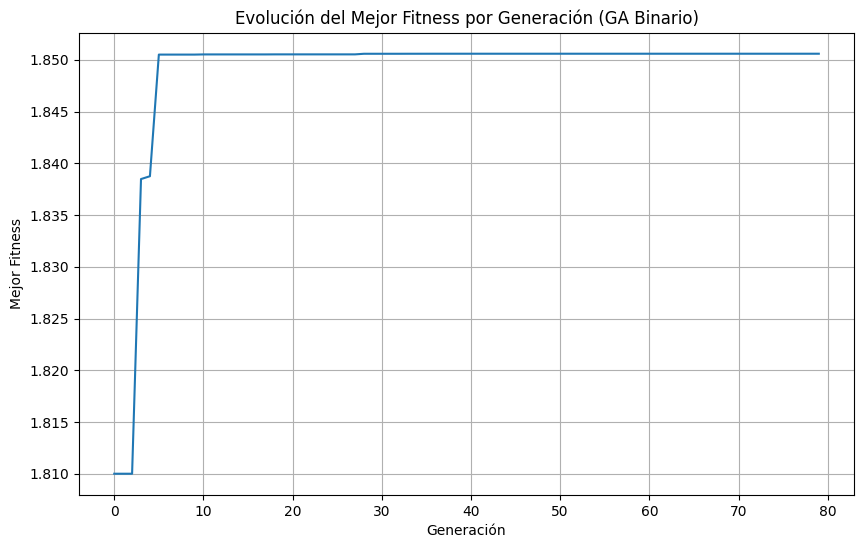

In [12]:
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib

# ----- Config -----
BITS = 16                 # precisión binaria
POP = 50                  # tamaño población
GENS = 80                 # generaciones
PX = 0.85                 # prob. cruce
PM = 1.0 / BITS           # prob. mutación por bit
ELITE = 1                 # número de élites

def decode(chrom):
    """Binario -> real en [0,1]."""
    ints = chrom.dot(1 << np.arange(chrom.shape[1])[::-1])
    return ints / (2**BITS - 1)

def fitness(x):
    return x * np.sin(10*np.pi*x) + 1.0

def init_pop():
    return np.random.randint(0, 2, size=(POP, BITS), dtype=np.uint8)

def roulette_selection(f):
    probs = f / (f.sum() + 1e-12)
    idx = np.random.choice(len(f), size=len(f), p=probs)
    return idx

def crossover(p1, p2):
    if np.random.rand() < PX:
        cut = np.random.randint(1, BITS)
        c1 = np.concatenate([p1[:cut], p2[cut:]])
        c2 = np.concatenate([p2[:cut], p1[cut:]])
        return c1, c2
    return p1.copy(), p2.copy()

def mutate(c):
    mask = np.random.rand(BITS) < PM
    c[mask] ^= 1
    return c

# ----- GA -----
pop = init_pop()
best_hist = []
best_chrom_hist = [] # Store the best chromosome for each generation
for g in range(GENS):
    x = decode(pop)
    f = fitness(x)
    # elitismo
    elite_idx = np.argsort(-f)[:ELITE]
    elites = pop[elite_idx].copy()

    # selección por ruleta
    parents_idx = roulette_selection(f)
    parents = pop[parents_idx]

    # reproducción
    next_pop = []
    for i in range(0, POP-ELITE, 2):
        p1, p2 = parents[i], parents[(i+1) % len(parents)]
        c1, c2 = crossover(p1, p2)
        c1, c2 = mutate(c1), mutate(c2)
        next_pop += [c1, c2]
    pop = np.vstack([np.array(next_pop[:POP-ELITE], dtype=np.uint8), elites])

    best = f.max()
    best_hist.append(best)
    best_chrom_hist.append(pop[np.argmax(f)].tolist()) # Store the best chromosome

# resultados
x = decode(pop)
f = fitness(x)
i = np.argmax(f)
print(f"Mejor x ≈ {x[i]:.6f}, f(x) = {f[i]:.6f}")

# Print the numerical values of the best fitness and chromosome history
print("\nEvolución del mejor fitness y cromosoma por generación:")
for i, (fitness_value, chromosome) in enumerate(zip(best_hist, best_chrom_hist)):
    print(f"Generación {i+1}: Fitness = {fitness_value:.6f}, Cromosoma = {chromosome}")


# Plotting the best fitness history
plt.figure(figsize=(10, 6))
plt.plot(best_hist)
plt.xlabel("Generación")
plt.ylabel("Mejor Fitness")
plt.title("Evolución del Mejor Fitness por Generación (GA Binario)")
plt.grid(True)
plt.show()

Mejor distancia encontrada ≈ 3.4158
Tour: [ 2  5  6  3 15 11  1  9  0 10 12  8 13 17  7 16  4 18 19 14]

Evolución del mejor distancia y tour por generación:
Generación 1: Distancia = 8.3667, Tour = [2, 3, 4, 13, 11, 8, 1, 19, 14, 9, 15, 16, 12, 6, 5, 7, 17, 0, 10, 18]
Generación 2: Distancia = 7.9935, Tour = [8, 10, 16, 18, 13, 2, 7, 4, 0, 11, 6, 5, 19, 17, 14, 3, 9, 12, 15, 1]
Generación 3: Distancia = 7.2678, Tour = [14, 7, 13, 9, 10, 17, 15, 19, 18, 1, 12, 2, 16, 4, 8, 0, 5, 3, 11, 6]
Generación 4: Distancia = 7.0103, Tour = [9, 10, 17, 14, 19, 7, 15, 1, 4, 18, 16, 12, 8, 2, 3, 11, 13, 5, 6, 0]
Generación 5: Distancia = 7.0103, Tour = [19, 7, 2, 9, 1, 11, 6, 3, 17, 13, 8, 12, 18, 4, 5, 14, 10, 0, 15, 16]
Generación 6: Distancia = 6.7532, Tour = [15, 10, 6, 13, 5, 2, 14, 0, 8, 12, 16, 17, 7, 4, 18, 19, 1, 11, 3, 9]
Generación 7: Distancia = 6.7532, Tour = [10, 0, 3, 6, 15, 2, 9, 13, 8, 12, 16, 17, 7, 4, 18, 19, 5, 14, 1, 11]
Generación 8: Distancia = 6.7532, Tour = [9, 1, 11, 0, 6, 

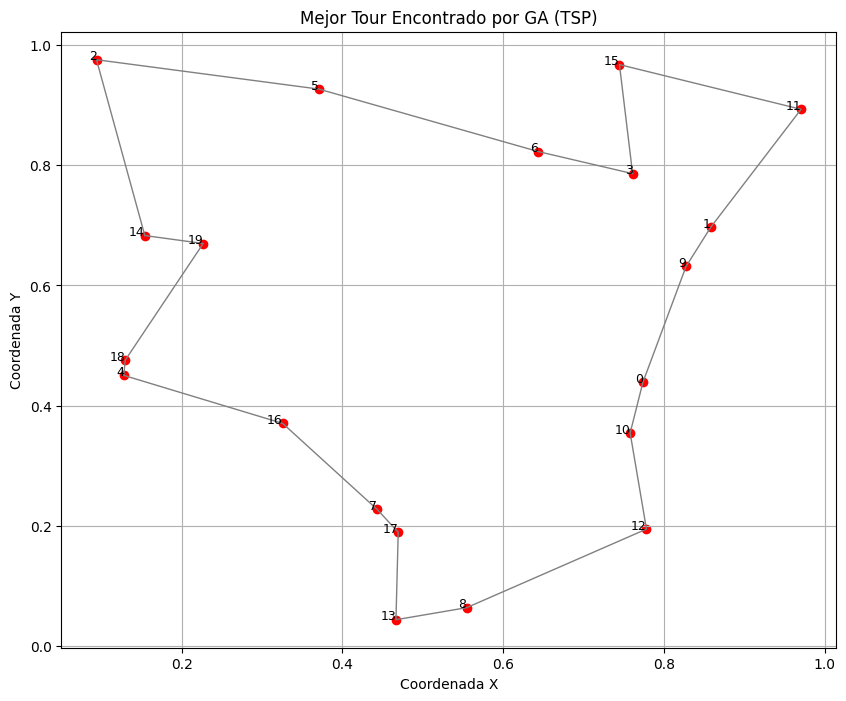

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Config -----
N_CITIES = 20
POP = 150
GENS = 400
TOUR_K = 3         # torneo
PX = 0.9
PM = 0.2
ELITE = 5
rng = np.random.default_rng(42)

# ciudades aleatorias (puedes reemplazar por tus puntos)
cities = rng.random((N_CITIES, 2))

def tour_length(perm):
    pts = cities[perm]
    d = np.sqrt(((pts - np.roll(pts, -1, axis=0))**2).sum(axis=1)).sum()
    # cierre del circuito
    return d

def fitness(pop):
    d = np.array([tour_length(ind) for ind in pop])
    # fitness mayor es mejor, así que invertimos distancia
    return 1.0 / (d + 1e-9), d

def init_pop():
    base = np.arange(N_CITIES)
    return np.array([rng.permutation(base) for _ in range(POP)])

def tournament_selection(f, k=TOUR_K):
    idx = []
    n = len(f)
    for _ in range(POP):
        cand = rng.integers(0, n, size=k)
        best = cand[np.argmax(f[cand])]
        idx.append(best)
    return np.array(idx)

def ordered_crossover(p1, p2):
    if rng.random() > PX:
        return p1.copy(), p2.copy()
    a, b = sorted(rng.integers(0, N_CITIES, size=2))
    c1 = -np.ones(N_CITIES, dtype=int)
    c2 = -np.ones(N_CITIES, dtype=int)
    # segmento
    c1[a:b] = p1[a:b]
    c2[a:b] = p2[a:b]
    # completar en orden relativo
    fill1 = [x for x in p2 if x not in c1]
    fill2 = [x for x in p1 if x not in c2]
    j1 = j2 = 0
    for i in list(range(0,a)) + list(range(b,N_CITIES)):
        c1[i] = fill1[j1]; j1 += 1
        c2[i] = fill2[j2]; j2 += 1
    return c1, c2

def swap_mutation(ind):
    if rng.random() < PM:
        i, j = rng.integers(0, N_CITIES, size=2)
        ind[i], ind[j] = ind[j], ind[i]
    return ind

# ----- GA -----
pop = init_pop()
best_dist_hist = []
best_tour_hist = [] # Store the best tour for each generation

for g in range(GENS):
    fit, dist = fitness(pop)
    # élite
    elite_idx = np.argsort(-fit)[:ELITE]
    elites = pop[elite_idx].copy()
    # selección
    parents = pop[tournament_selection(fit)]
    # reproducción
    next_pop = []
    for i in range(0, POP-ELITE, 2):
        p1, p2 = parents[i], parents[(i+1) % len(parents)]
        c1, c2 = ordered_crossover(p1, p2)
        c1, c2 = swap_mutation(c1), swap_mutation(c2)
        next_pop += [c1, c2]
    pop = np.vstack([np.array(next_pop[:POP-ELITE]), elites])

    # Track best distance and tour
    current_best_idx = np.argmin(dist)
    best_dist_hist.append(dist[current_best_idx])
    best_tour_hist.append(pop[current_best_idx].tolist())


# resultados finales
fit, dist = fitness(pop)
i = np.argmax(fit)
final_best_dist = dist[i]
final_best_tour = pop[i]
print(f"Mejor distancia encontrada ≈ {final_best_dist:.4f}")
print("Tour:", final_best_tour)


# Print the evolution of the best distance and tour
print("\nEvolución del mejor distancia y tour por generación:")
for i, (dist_value, tour) in enumerate(zip(best_dist_hist, best_tour_hist)):
    print(f"Generación {i+1}: Distancia = {dist_value:.4f}, Tour = {tour}")


# Plotting the best tour
plt.figure(figsize=(10, 8))
plt.scatter(cities[:, 0], cities[:, 1], c='red', marker='o')
# Plot the path
best_tour_coords = cities[final_best_tour]
plt.plot(best_tour_coords[:, 0], best_tour_coords[:, 1], 'gray', linestyle='-', linewidth=1)
# Close the loop
plt.plot([best_tour_coords[-1, 0], best_tour_coords[0, 0]],
         [best_tour_coords[-1, 1], best_tour_coords[0, 1]], 'gray', linestyle='-', linewidth=1)

# Add city numbers
for i in range(N_CITIES):
    plt.text(cities[i, 0], cities[i, 1], str(i), fontsize=9, ha='right')

plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.title("Mejor Tour Encontrado por GA (TSP)")
plt.grid(True)
plt.show()

Muestra de puntos del frente de Pareto (f1, f2):
[[0.00000000e+00 1.00000114e+00]
 [3.09724954e-04 9.82403262e-01]
 [1.17850138e-03 9.65841227e-01]
 [3.15284042e-03 9.43955920e-01]
 [6.06648140e-03 9.22112489e-01]
 [9.77118275e-03 9.01953121e-01]
 [1.66005433e-02 8.76517404e-01]
 [1.83569931e-02 8.64514050e-01]
 [2.39956771e-02 8.45100033e-01]
 [2.86429943e-02 8.30759849e-01]]


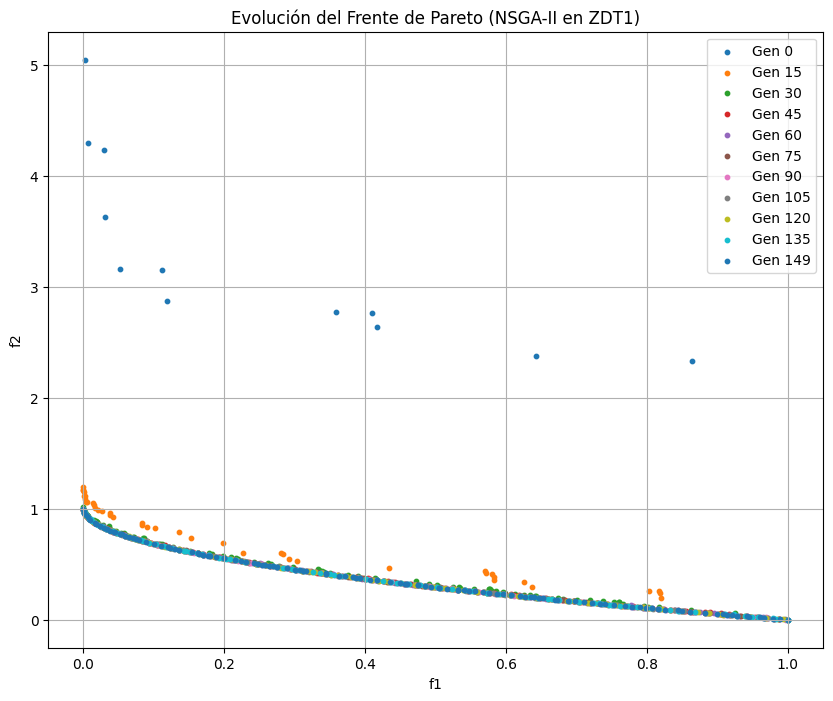

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Config -----
N = 30                 # dimensiones (ZDT1 usa n>=2)
POP = 120
GENS = 150
ETA_C = 15.0           # SBX
ETA_M = 20.0           # mutación polinómica
PC = 0.9
PM = 1.0 / N
LOW, HIGH = 0.0, 1.0
rng = np.random.default_rng(0)

# ----- Problema ZDT1 (minimizar f1,f2) -----
def evaluate(X):
    # X: (pop, N)
    f1 = X[:, 0]
    g = 1 + 9 * X[:, 1:].mean(axis=1)
    f2 = g * (1 - np.sqrt(f1 / g))
    return np.column_stack([f1, f2])

def sbx_crossover(p1, p2):
    if rng.random() > PC:
        return p1.copy(), p2.copy()
    c1, c2 = p1.copy(), p2.copy()
    for i in range(N):
        if rng.random() <= 0.5:
            if abs(p1[i]-p2[i]) > 1e-14:
                x1, x2 = sorted([p1[i], p2[i]])
                lb, ub = LOW, HIGH
                rand = rng.random()
                beta = 1.0 + (2.0*(x1 - lb)/(x2 - x1))
                alpha = 2.0 - beta**-(ETA_C+1)
                if rand <= 1.0/alpha:
                    betaq = (rand*alpha)**(1.0/(ETA_C+1.0))
                else:
                    betaq = (1.0/(2.0 - rand*alpha))**(1.0/(ETA_C+1.0))
                c1[i] = 0.5*((x1 + x2) - betaq*(x2 - x1))

                beta = 1.0 + (2.0*(ub - x2)/(x2 - x1))
                alpha = 2.0 - beta**-(ETA_C+1)
                if rand <= 1.0/alpha:
                    betaq = (rand*alpha)**(1.0/(ETA_C+1.0))
                else:
                    betaq = (1.0/(2.0 - rand*alpha))**(1.0/(ETA_C+1.0))
                c2[i] = 0.5*((x1 + x2) + betaq*(x2 - x1))
                # límites
                c1[i] = np.clip(c1[i], LOW, HIGH)
                c2[i] = np.clip(c2[i], LOW, HIGH)
    return c1, c2

def poly_mutation(x):
    y = x.copy()
    for i in range(N):
        if rng.random() < PM:
            u = rng.random()
            if u < 0.5:
                delta = (2*u)**(1/(ETA_M+1)) - 1
            else:
                delta = 1 - (2*(1-u))**(1/(ETA_M+1))
            y[i] = np.clip(y[i] + delta*(HIGH - LOW), LOW, HIGH)
    return y

# ----- NSGA-II utils -----
def fast_non_dominated_sort(F):
    # F: (pop, 2) objetivos a minimizar
    S = [[] for _ in range(len(F))]
    n = np.zeros(len(F), dtype=int)
    rank = np.zeros(len(F), dtype=int)
    fronts = [[]]

    for p in range(len(F)):
        for q in range(len(F)):
            if p == q:
                continue
            if (F[p][0] <= F[q][0] and F[p][1] <= F[q][1]) and (F[p][0] < F[q][0] or F[p][1] < F[q][1]):
                S[p].append(q)
            elif (F[q][0] <= F[p][0] and F[q][1] <= F[p][1]) and (F[q][0] < F[p][0] or F[q][1] < F[p][1]):
                n[p] += 1
        if n[p] == 0:
            rank[p] = 0
            fronts[0].append(p)

    i = 0
    while fronts[i]:
        next_front = []
        for p in fronts[i]:
            for q in S[p]:
                n[q] -= 1
                if n[q] == 0:
                    rank[q] = i+1
                    next_front.append(q)
        i += 1
        fronts.append(next_front)
    fronts.pop()
    return fronts, rank

def crowding_distance(F, front_idx):
    # F: (pop,2) - calcular crowding en un frente
    d = np.zeros(len(front_idx))
    if len(front_idx) == 0:
        return d
    vals = F[front_idx]
    for m in range(vals.shape[1]):
        order = np.argsort(vals[:, m])
        d[order[0]] = d[order[-1]] = np.inf
        min_v, max_v = vals[order[0], m], vals[order[-1], m]
        if max_v - min_v < 1e-12:
            continue
        for i in range(1, len(front_idx)-1):
            d[order[i]] += (vals[order[i+1], m] - vals[order[i-1], m]) / (max_v - min_v)
    return d

def tournament_selection_nsga2(pop, F, rank, crowd):
    # torneo binario con (rank, crowd)
    idx = []
    n = len(pop)
    for _ in range(n):
        a, b = rng.integers(0, n), rng.integers(0, n)
        # preferir menor rank; si empatan, mayor crowding
        if (rank[a] < rank[b]) or (rank[a]==rank[b] and crowd[a] > crowd[b]):
            idx.append(a)
        else:
            idx.append(b)
    return np.array(idx)

# ----- Inicializar y ejecutar -----
X = rng.uniform(LOW, HIGH, size=(POP, N))
# Store the best front (rank 0) at certain generations for visualization
fronts_hist = []

for g in range(GENS):
    F = evaluate(X)
    # ordenar por frentes
    fronts, rank = fast_non_dominated_sort(F)
    crowd = np.zeros(POP)
    for fr in fronts:
        cd = crowding_distance(F, fr)
        crowd[np.array(fr)] = cd

    # selección padres
    sel_idx = tournament_selection_nsga2(X, F, rank, crowd)
    parents = X[sel_idx]

    # reproducción
    children = []
    for i in range(0, POP, 2):
        p1, p2 = parents[i], parents[(i+1) % POP]
        c1, c2 = sbx_crossover(p1, p2)
        c1, c2 = poly_mutation(c1), poly_mutation(c2)
        children += [c1, c2]
    children = np.array(children)[:POP]

    # unión y reducción (elitismo NSGA-II)
    U = np.vstack([X, children])
    FU = evaluate(U)
    frontsU, _ = fast_non_dominated_sort(FU)

    newX = []
    for fr in frontsU:
        if len(newX) + len(fr) <= POP:
            newX += list(fr)
        else:
            # llenar con mayor crowding dentro de este frente
            cd = crowding_distance(FU, fr)
            order = np.argsort(-cd)
            rem = POP - len(newX)
            newX += list(np.array(fr)[order[:rem]])
            break
    X = U[newX]

    # Store the first front (non-dominated solutions) for visualization
    # You might store it less frequently if GENS is large
    if g % (GENS // 10) == 0 or g == GENS - 1: # Store every 10% of generations and the final one
         F_current = evaluate(X)
         fronts_current, _ = fast_non_dominated_sort(F_current)
         if len(fronts_current) > 0:
             fronts_hist.append((g, F_current[fronts_current[0]]))


# resultado: frente aproximado
F = evaluate(X)
print("Muestra de puntos del frente de Pareto (f1, f2):")
# Sort the final front by f1 for better visualization of the front
final_front_indices = fast_non_dominated_sort(F)[0][0]
final_front = F[final_front_indices]
final_front_sorted = final_front[np.argsort(final_front[:, 0])]
print(final_front_sorted[:10])


# Plotting the evolution of the non-dominated front
plt.figure(figsize=(10, 8))
for gen, front in fronts_hist:
    plt.scatter(front[:, 0], front[:, 1], label=f"Gen {gen}", s=10)

plt.xlabel("f1"); plt.ylabel("f2"); plt.title("Evolución del Frente de Pareto (NSGA-II en ZDT1)")
plt.legend()
plt.grid(True)
plt.show()